# Voltage and Temperature data analysis
This document deals on evaluating data gathered at night the 17.11.2025 with the PicoCore Weather Test Probe (WTP).

## Dependencies
The dependencies used:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Constants
These are the constants used to evaluate and calculate:

In [19]:
T = 600
REF_TIME = "20:35:15"
V_max = 5.3
V_nominal = 5.2
V_min = 3.6 
P_inflection = 0.2
CSV_DATA_FILE = "17-11-2025-WTP-Data.csv"

## The Data
Now we load the CSV-File in order to evaluate the data.

In [20]:
df = pd.read_csv(CSV_DATA_FILE)
df.head(10)

,time,temp,humid,volt
0,600371,21,63,5.206925
1,1200422,13,78,5.185456
2,1800486,10,90,5.164584
3,2400571,10,95,5.142638
4,3000607,10,98,5.138224
5,3600628,9,98,5.080140
6,4200654,9,98,5.052826
7,4800660,9,97,5.034936
8,5400701,9,94,5.006668
9,6000722,9,94,4.966570


As we can see `time` is in *ms* since system-boot,then `temperature` in *C°* and `relative humidity` in *%* and the current `voltage` measurement.The time interval $T$ is 10-min in seconds.

> Note: Only 10 samples are displayed out of 59.

## Converting the ms-time to Readable

In [25]:
ref_time = datetime.strptime(REF_TIME, "%H:%M:%S")


time = []
for i in df["time"]:
    new_time = ref_time + timedelta(milliseconds=i)
    time.append(new_time.strftime("%H:%M:%S"))

print(time)

['20:45:15', '20:55:15', '21:05:15', '21:15:15', '21:25:15', '21:35:15', '21:45:15', '21:55:15', '22:05:15', '22:15:15', '22:25:15', '22:35:15', '22:45:15', '22:55:15', '23:05:15', '23:15:15', '23:25:16', '23:35:16', '23:45:16', '23:55:16', '00:05:16', '00:15:16', '00:25:16', '00:35:16', '00:45:16', '00:55:16', '01:05:16', '01:15:16', '01:25:16', '01:35:16', '01:45:16', '01:55:16', '02:05:16', '02:15:17', '02:25:17', '02:35:17', '02:45:17', '02:55:17', '03:05:17', '03:15:17', '03:25:17', '03:35:17', '03:45:17', '03:55:17', '04:05:17', '04:15:17', '04:25:17', '04:35:17', '04:45:17', '04:55:18', '05:05:18', '05:15:18', '05:25:18', '05:35:18', '05:45:18', '05:55:18', '06:05:18', '06:15:18']


## Plotting
In order to see correlations and make data extraction and interpretation easier we plot them.

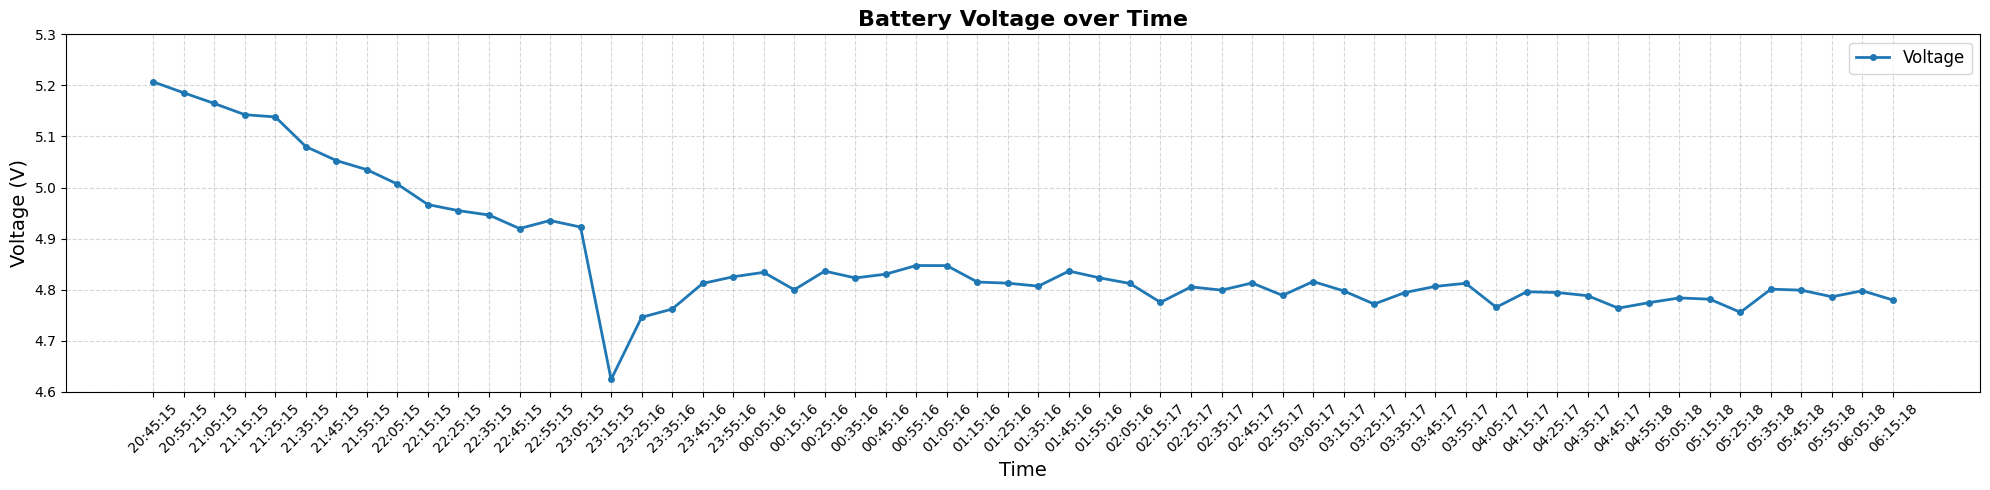

In [30]:
plt.figure(figsize=(20, 5))  # Make it wide for readability

plt.plot(time, df['volt'], label='Voltage', linewidth=2, marker='o', markersize=4)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Voltage (V)", fontsize=14)
plt.title("Battery Voltage over Time", fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Optional: set y-axis limits to highlight small variations
plt.ylim(4.6, 5.3)

plt.tight_layout()
plt.show()

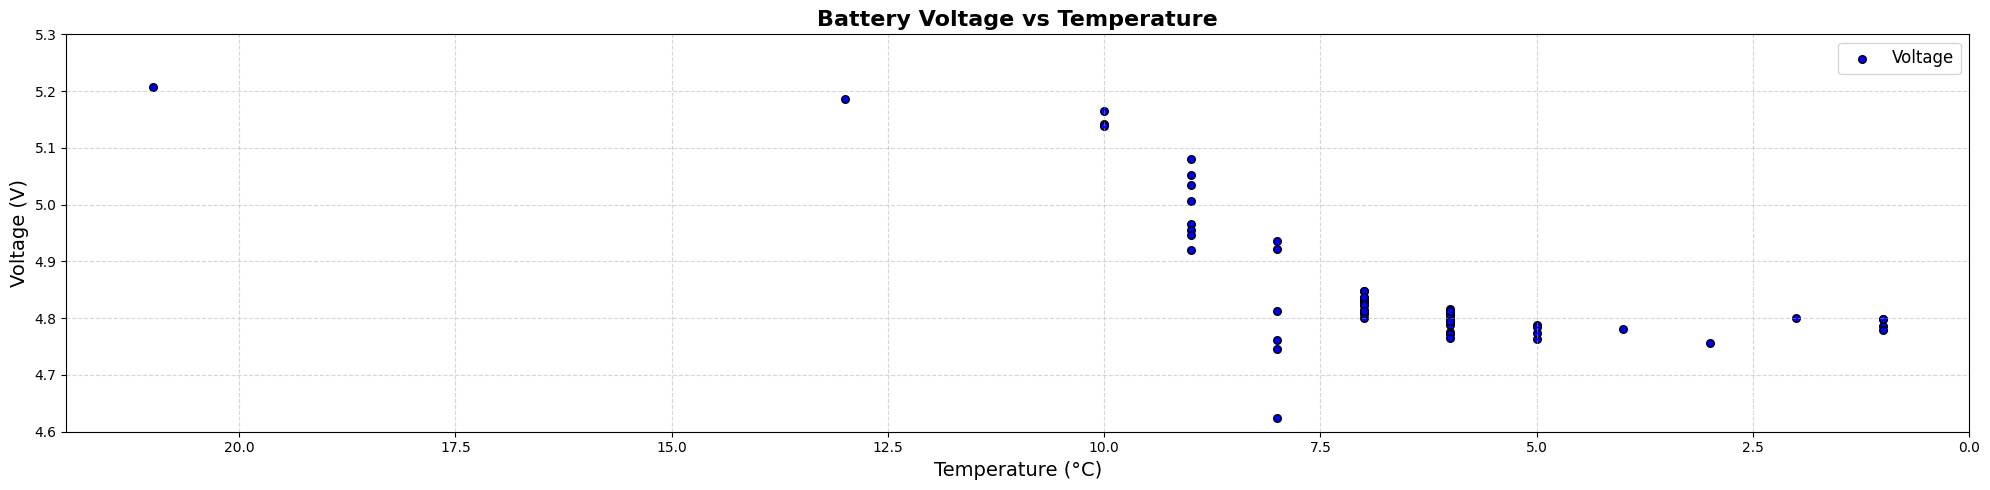

In [39]:
plt.figure(figsize=(20, 5))

# Scatter plot (time sequence preserved, temp may repeat)
plt.scatter(
    df['temp'], 
    df['volt'], 
    label='Voltage', 
    s=30,          # marker size
    c='blue',      # color
    marker='o', 
    edgecolors='black',  # optional edge for clarity
)

plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Voltage (V)", fontsize=14)
plt.title("Battery Voltage vs Temperature", fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# Reverse x-axis so high temperatures are left
plt.gca().invert_xaxis()

# Optional: y-axis limits
plt.ylim(4.6, 5.3)

plt.tight_layout()
plt.show()